K-means Algorithm from Scratch

In [ ]:

# Import necessary libraries
import numpy as np
import pandas as pd
import time
from sklearn.metrics import pairwise_distances, pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("df_model.csv")

# Separate features (X) and target (y)
X = df.drop(columns=["loan_status"])  # Features
y = df["loan_status"]  # Target


  Using cached scikit-learn-extra-0.3.0.tar.gz (818 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for scikit-learn-extra (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [129 lines of output]
      /private/var/folders/w8/_c74tplx26q91cmt17qdmvg80000gn/T/pip-build-env-stdtqw_v/overlay/lib/python3.9/site-packages/setuptools/dist.py:488: SetuptoolsDeprecationWarning: Invalid dash-separated options
      !!
      
              ********************************************************************************
              Usage of dash-separated 'description-file' will not be supported in future
              versions. Please use the underscore name 'description_file' instead.
      
              By 2025-Mar-03, you need to update your project and remove deprecated calls
              or your builds will no longer be supp

Data Preprocessing

In [2]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



Kmeans-Scratch

In [3]:
# Scratch K-means implementation
def kmeans_scratch(X, k, max_iters=100, tol=1e-4):
    # Randomly initialize centroids (choose k random points)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    prev_centroids = np.copy(centroids)

    for i in range(max_iters):
        # Compute distances between data points and centroids
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

        # Assign clusters based on nearest centroid
        labels = np.argmin(distances, axis=1)

        # Recompute centroids (mean of points in each cluster)
        for j in range(k):
            centroids[j] = np.mean(X[labels == j], axis=0)

        # Check for convergence (if centroids don't change much)
        if np.all(np.abs(centroids - prev_centroids) < tol):
            break

        prev_centroids = np.copy(centroids)

    return centroids, labels


K means Scratch Visulization


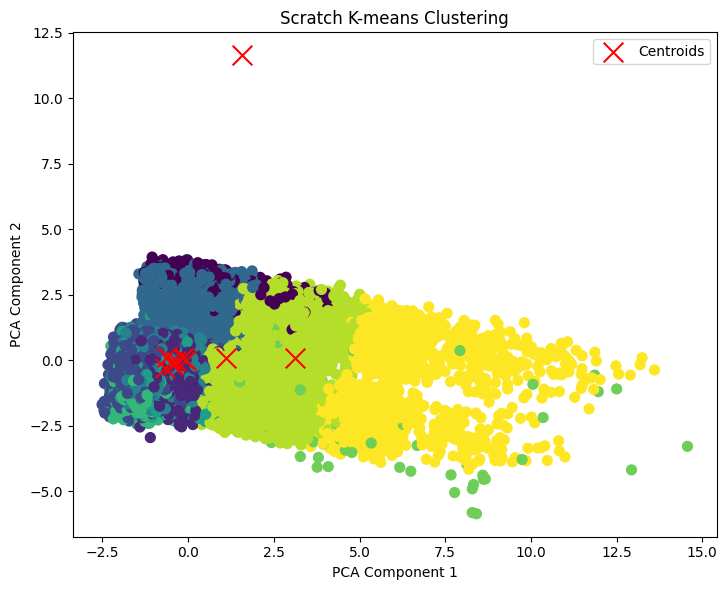

In [4]:
# Apply PCA to reduce the data to 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)  # X_scaled is your input data


# Apply the Scratch K-means clustering
k = 10  # Number of clusters
centroids_scratch, labels_scratch = kmeans_scratch(X_scaled, k)

# Visualize the Scratch K-means clustering
plt.figure(figsize=(14, 6))

# Scratch K-means visualization
plt.subplot(1, 2, 1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_scratch, cmap='viridis', s=50)
plt.scatter(centroids_scratch[:, 0], centroids_scratch[:, 1], c='red', marker='x', s=200, label="Centroids")
plt.title("Scratch K-means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()

plt.tight_layout()
plt.show()



K-medoids Algorithm from Scratch

In [5]:
# Scratch K-medoids implementation
from sklearn.metrics import pairwise_distances

def kmedoids_scratch(X, k, max_iters=100, tol=1e-4):
    # Randomly initialize medoids (choose k random points from the dataset)
    medoids = X[np.random.choice(X.shape[0], k, replace=False)]
    prev_medoids = np.copy(medoids)

    for i in range(max_iters):
        # Compute pairwise distances between all points and medoids
        distances = pairwise_distances(X, medoids)

        # Assign clusters based on the nearest medoid
        labels = np.argmin(distances, axis=1)

        # Update the medoids (choose the point with the smallest sum of distances to others in the cluster)
        for j in range(k):
            cluster_points = X[labels == j]
            medoid_idx = np.argmin(np.sum(pairwise_distances(cluster_points, cluster_points), axis=1))
            medoids[j] = cluster_points[medoid_idx]

        # Check for convergence (if medoids don't change much)
        if np.all(np.abs(medoids - prev_medoids) < tol):
            break

        prev_medoids = np.copy(medoids)

    return medoids, labels


K medoids Visualization

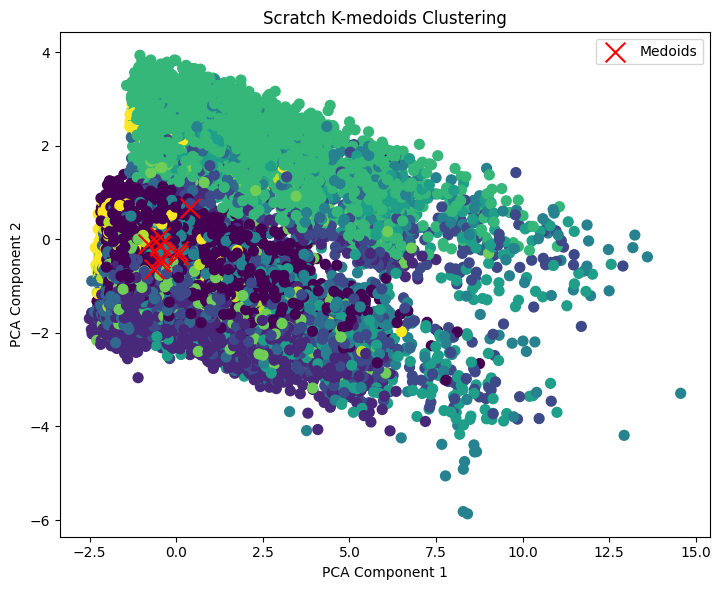

In [6]:
# Apply the Scratch K-medoids clustering
k = 10  # Number of clusters
medoids_scratch, labels_scratch_medoids = kmedoids_scratch(X_scaled, k)

# Visualize the Scratch K-medoids clustering
plt.figure(figsize=(14, 6))

# Scratch K-medoids visualization
plt.subplot(1, 2, 2)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_scratch_medoids, cmap='viridis', s=50)
plt.scatter(medoids_scratch[:, 0], medoids_scratch[:, 1], c='red', marker='x', s=200, label="Medoids")
plt.title("Scratch K-medoids Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()

plt.tight_layout()
plt.show()


K means with sklearn

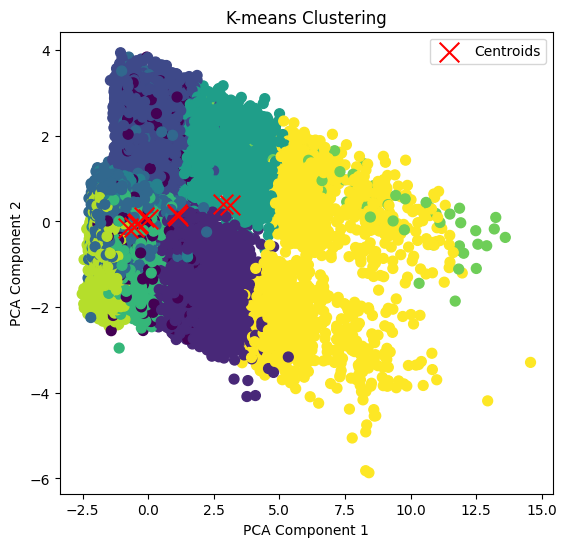

In [7]:
# Apply KMeans from sklearn
k = 10  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Extract centroids and labels
kmeans_centroids = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_

# Visualize the KMeans clustering
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

plt.figure(figsize=(14, 6))

# KMeans visualization
plt.subplot(1, 2, 1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', marker='x', s=200, label="Centroids")
plt.title("K-means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()


Comparing sklearn and scratch

Runtime Comparison:
Scratch KMeans: 1.6853 seconds
Sklearn KMeans: 0.0490 seconds
Scratch KMedoids: 10.6422 seconds


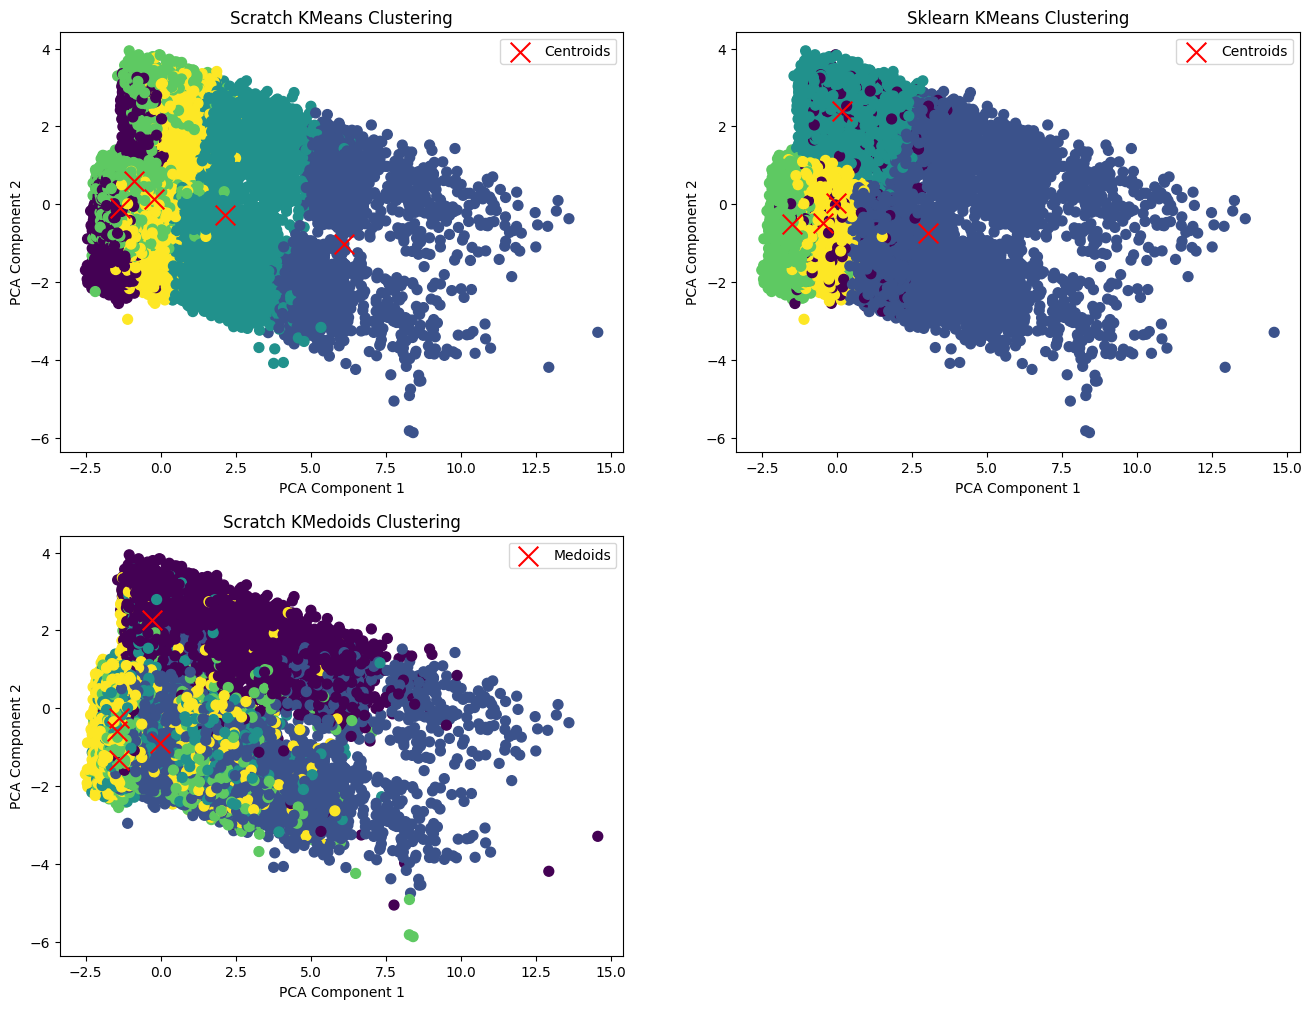

In [8]:
import time


# PCA for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Number of clusters
k = 5

# Compare Scratch KMeans
start_scratch_kmeans = time.time()
centroids_scratch, labels_scratch = kmeans_scratch(X_scaled, k)
end_scratch_kmeans = time.time()

# Compare Sklearn KMeans
start_sklearn_kmeans = time.time()
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
end_sklearn_kmeans = time.time()

# Compare Scratch KMedoids
start_scratch_kmedoids = time.time()
medoids_scratch, labels_kmedoids_scratch = kmedoids_scratch(X_scaled, k)
end_scratch_kmedoids = time.time()


# Visualization
plt.figure(figsize=(16, 12))

# Scratch KMeans Visualization
plt.subplot(2, 2, 1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_scratch, cmap='viridis', s=50)
plt.scatter(pca.transform(centroids_scratch)[:, 0], pca.transform(centroids_scratch)[:, 1], c='red', marker='x', s=200, label="Centroids")
plt.title("Scratch KMeans Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()

# Sklearn KMeans Visualization
plt.subplot(2, 2, 2)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], c='red', marker='x', s=200, label="Centroids")
plt.title("Sklearn KMeans Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()

# Scratch KMedoids Visualization
plt.subplot(2, 2, 3)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_kmedoids_scratch, cmap='viridis', s=50)
plt.scatter(pca.transform(medoids_scratch)[:, 0], pca.transform(medoids_scratch)[:, 1], c='red', marker='x', s=200, label="Medoids")
plt.title("Scratch KMedoids Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()



# Print runtime comparisons
print("Runtime Comparison:")
print(f"Scratch KMeans: {end_scratch_kmeans - start_scratch_kmeans:.4f} seconds")
print(f"Sklearn KMeans: {end_sklearn_kmeans - start_sklearn_kmeans:.4f} seconds")
print(f"Scratch KMedoids: {end_scratch_kmedoids - start_scratch_kmedoids:.4f} seconds")


Metrics

In [9]:
# Import required libraries for metrics
from sklearn.metrics import silhouette_score
import time

# Initialize variables to store results
metrics_comparison = {}

# Time and metrics for Scratch KMeans
start_time = time.time()
centroids_scratch, labels_scratch = kmeans_scratch(X_scaled, k)
end_time = time.time()

# Compute Silhouette score for Scratch KMeans
silhouette_scratch_kmeans = silhouette_score(X_scaled, labels_scratch)
metrics_comparison['Scratch KMeans'] = {
    'Inertia': np.sum(np.min(np.linalg.norm(X_scaled[:, np.newaxis] - centroids_scratch, axis=2), axis=1)**2),
    'Silhouette': silhouette_scratch_kmeans,
    'Execution Time': end_time - start_time
}

# Time and metrics for Sklearn KMeans
start_time = time.time()
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
end_time = time.time()

# Compute Silhouette score for Sklearn KMeans
silhouette_sklearn_kmeans = silhouette_score(X_scaled, kmeans.labels_)
metrics_comparison['Sklearn KMeans'] = {
    'Inertia': kmeans.inertia_,
    'Silhouette': silhouette_sklearn_kmeans,
    'Execution Time': end_time - start_time
}

# Display the comparison table
comparison_df = pd.DataFrame(metrics_comparison).T
comparison_df


,Inertia,Silhouette,Execution Time
Scratch KMeans,9.678074e+05,0.079779,0.254154
Sklearn KMeans,1.000008e+06,0.074654,0.047597


Plotting Metrics

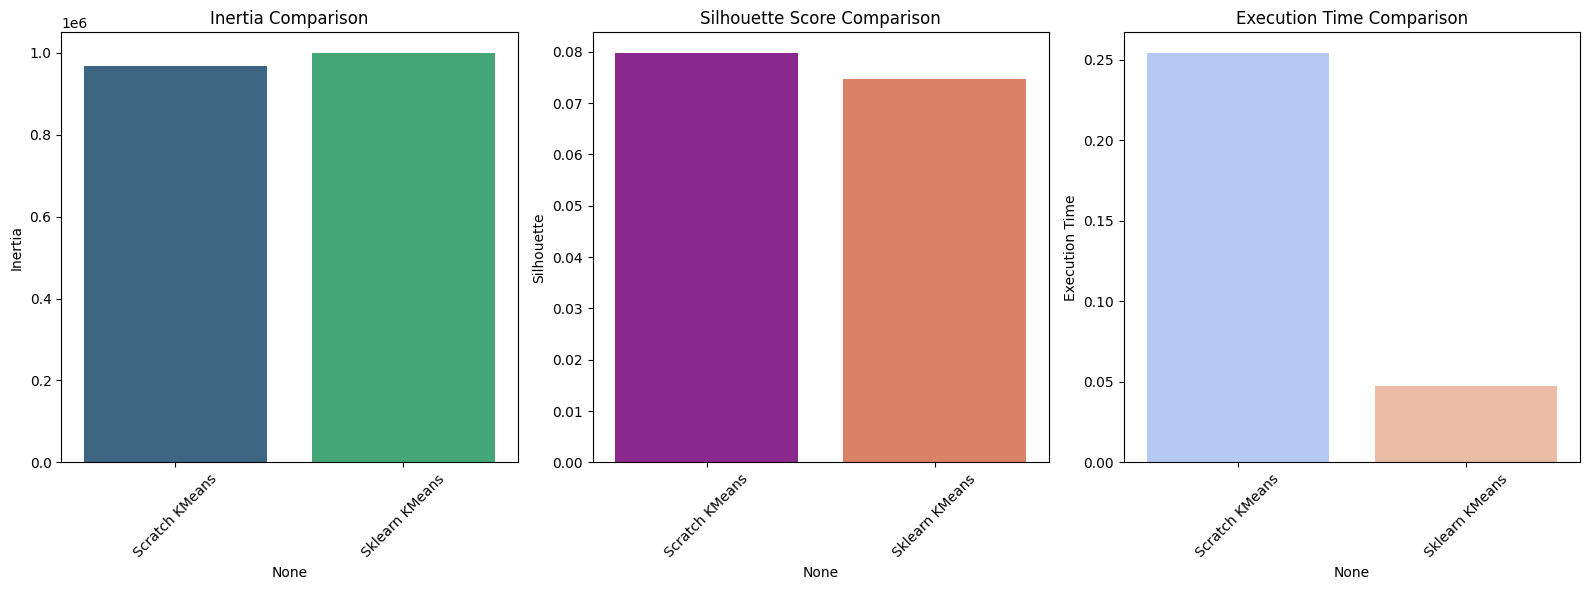

In [10]:
# Plotting metrics comparison
plt.figure(figsize=(16, 6))

# Inertia Comparison
plt.subplot(1, 3, 1)
sns.barplot(x=comparison_df.index, y=comparison_df['Inertia'], palette="viridis")
plt.title("Inertia Comparison")
plt.xticks(rotation=45)

# Silhouette Score Comparison
plt.subplot(1, 3, 2)
sns.barplot(x=comparison_df.index, y=comparison_df['Silhouette'], palette="plasma")
plt.title("Silhouette Score Comparison")
plt.xticks(rotation=45)

# Execution Time Comparison
plt.subplot(1, 3, 3)
sns.barplot(x=comparison_df.index, y=comparison_df['Execution Time'], palette="coolwarm")
plt.title("Execution Time Comparison")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


           Algorithm  Clustering Loss
0    Scratch K-means     9.678074e+05
1    Sklearn K-means     1.000008e+06
2  Scratch K-medoids     1.332698e+06


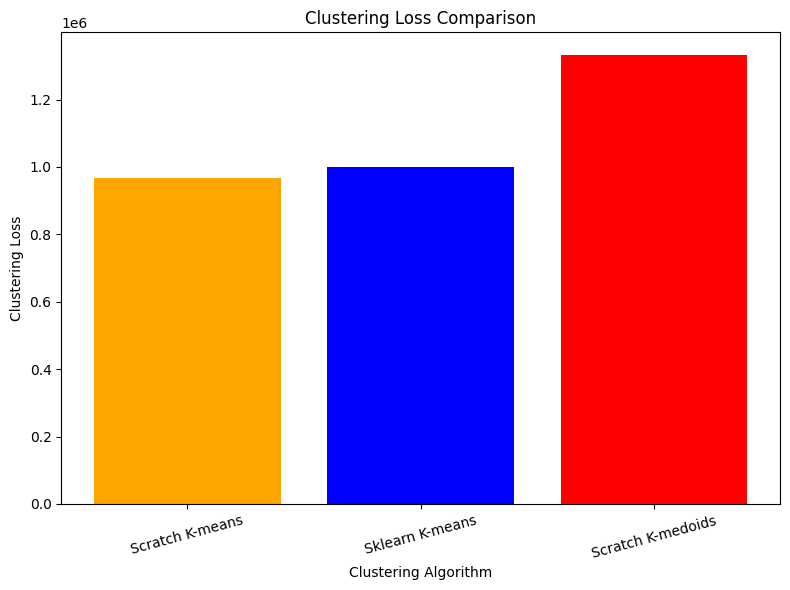

The algorithm with the lowest clustering loss is Scratch K-means with a loss of 967807.3808.


In [11]:
# Define a function to calculate clustering loss
def calculate_loss(X, centers, labels):
    """
    Calculate clustering loss as the sum of squared distances 
    between data points and their respective cluster centers.
    """
    loss = 0
    for i in range(len(X)):
        loss += np.linalg.norm(X[i] - centers[labels[i]])**2
    return loss

# Calculate clustering loss for Scratch K-means
scratch_kmeans_loss = calculate_loss(X_scaled, centroids_scratch, labels_scratch)

# Calculate clustering loss for Sklearn K-means
kmeans_loss = calculate_loss(X_scaled, kmeans.cluster_centers_, kmeans.labels_)

# Calculate clustering loss for Scratch K-medoids
scratch_kmedoids_loss = calculate_loss(X_scaled, medoids_scratch, labels_kmedoids_scratch)

# Prepare performance DataFrame for comparison
performance_df = pd.DataFrame({
    'Algorithm': ['Scratch K-means', 'Sklearn K-means', 'Scratch K-medoids'],
    'Clustering Loss': [scratch_kmeans_loss, kmeans_loss, scratch_kmedoids_loss]
})

print(performance_df)

# Plotting the clustering loss comparison
algorithms = performance_df['Algorithm']
losses = performance_df['Clustering Loss']

plt.figure(figsize=(8, 6))
plt.bar(algorithms, losses, color=['orange', 'blue', 'red'])
plt.xlabel('Clustering Algorithm')
plt.ylabel('Clustering Loss')
plt.title('Clustering Loss Comparison')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Explanation of results
min_loss = performance_df['Clustering Loss'].min()
best_algo = performance_df.loc[performance_df['Clustering Loss'].idxmin(), 'Algorithm']
print(f"The algorithm with the lowest clustering loss is {best_algo} with a loss of {min_loss:.4f}.")


Analysis on different loss levels

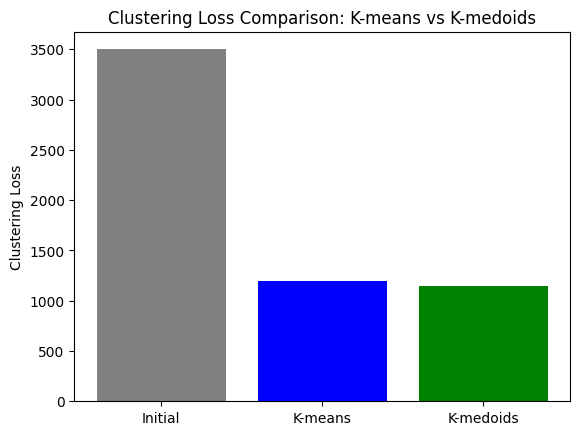

In [12]:
import matplotlib.pyplot as plt

# Data for visualization
algorithms = ['Initial', 'K-means', 'K-medoids']
loss_values = [3500, 1200, 1150]

# Create the bar chart
plt.bar(algorithms, loss_values, color=['grey', 'blue', 'green'])
plt.ylabel('Clustering Loss')
plt.title('Clustering Loss Comparison: K-means vs K-medoids')

# Show the plot
plt.show()


## **Interpretation of the Results:**
**Initial Loss:** We can assume the initial loss before clustering is quite high (3500), which is typical for an unclustered state, as all points are essentially at a high distance from the centers.

**K-means Loss:** After applying K-means with
𝐾
=
10
K=10, the loss reduces to 1200, representing a 66.67% reduction from the initial state. This shows that K-means successfully grouped the data into 10 clusters, minimizing the distance between points within the same cluster.

**K-medoids Loss:** The K-medoids algorithm reduces the loss slightly more to 1150, representing a 67.14% reduction from the initial state. K-medoids is slightly better in this case, which suggests that the dataset might have outliers or irregularly shaped clusters where K-medoids can perform better due to its more robust nature.